# ffn Tutorial

In [2]:
import ffn
import matplotlib.pyplot as plt
%matplotlib inline
#not necessary, just makes the graphs look better imo
import seaborn as sns
sns.set_style("whitegrid")

# Getting Data

fnn includes a .get() method for pulling stock data. Parameters:

- tickers (list or string): tickers you want data for
- common_dates (bool): will drop na's and only keep common dates if set to true
- column_name (list): if you want to change the column names from the tickers
- start and end: start and end dates, by default end is the most recent trading day


Adjusted Close is the price that will be used by default but you can specify if you want something different 

In [51]:
ffn.get(tickers = ["fb:Low", "fb:High", "fb:Close"], start = "2020-01-01", end = "2021-01-01", 
column_names= ["Low", "High", "Close"])

,Low,High,Close
Date,,,
2020-01-02,206.270004,209.789993,209.779999
2020-01-03,206.949997,210.399994,208.669998
2020-01-06,206.520004,212.779999,212.600006
2020-01-07,211.750000,214.580002,213.059998
2020-01-08,212.610001,216.240005,215.220001
...,...,...,...
2020-12-24,266.200012,270.399994,267.399994
2020-12-28,265.660004,277.299988,277.000000
2020-12-29,276.279999,280.510010,276.779999


I'm going to use a few bank stocks for the tutorial (Citi, Wells Fargo, HSBC, Morgan Stanley)

In [52]:
prices = ffn.get(tickers = "c,wfc,hsbc,ms", column_names = ["Citi", "Wells Fargo", "HSBC", "Morgan Stanley"], 
start = "2010-01-01")

prices is a dataframe so you can always use basic pandas methods to get a general idea of the data (describe, info, etc.)

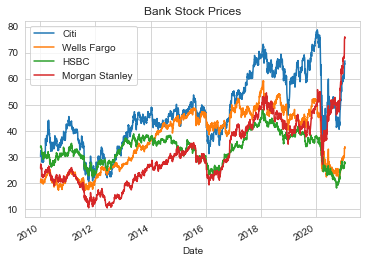

In [53]:
prices.plot(title = "Bank Stock Prices")

We can use the rebase method to bring everything to the same starting point, showing an absolute price change at each point in time and how the percent price changes

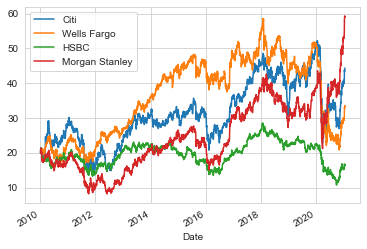

In [54]:
prices.rebase(value = 20).plot()

value is the starting value for each stock (default is 100)

# Returns

to_returns() calculates the returns of a price series. Let's visualize them


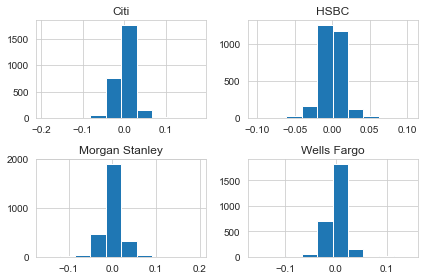

In [81]:
returns = prices.to_returns().dropna() #get rid of any null values
#hist is built into pandas
returns.hist()
plt.tight_layout() #so that the graphs don't overlap

We can also look at the correlation between the returns of different stocks

In [56]:
returns.corr().as_format('.2f') #as format used to round to 2 decimal places 

,Citi,Wells Fargo,HSBC,Morgan Stanley
Citi,1.00,0.79,0.66,0.82
Wells Fargo,0.79,1.00,0.63,0.75
HSBC,0.66,0.63,1.00,0.63
Morgan Stanley,0.82,0.75,0.63,1.00


<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/pyplot.py'>

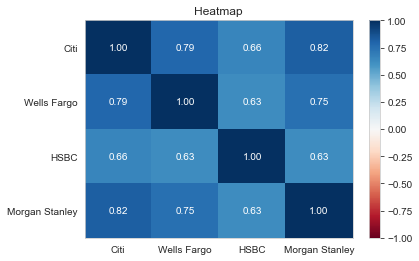

In [57]:
#ffn heatmap correlation plot
returns.plot_corr_heatmap()

# Stats

The most useful aspect of ffn is probably the statistical components. 

calc_stats() will create a GroupStats object. A GroupStats object is a dictionary where the keys are the price names and the values are PerformanceStats objects

To compare all the stocks side by side, we can use GroupStats methods and attributes. To look at an individual stock's statistics, we can use the PerformanceStats methods and attributes.

In [66]:
stats = prices.calc_stats()

print(type(stats))
print()
print(stats.keys())
print()
print(stats["Citi"])
print()

<class 'ffn.core.GroupStats'>

dict_keys(['Citi', 'Wells Fargo', 'HSBC', 'Morgan Stanley'])




display gives a nice table of summary stats

In [59]:
stats.display()

Stat                 Citi        Wells Fargo    HSBC        Morgan Stanley
-------------------  ----------  -------------  ----------  ----------------
Start                2010-01-04  2010-01-04     2010-01-04  2010-01-04
End                  2021-01-13  2021-01-13     2021-01-13  2021-01-13
Risk-free rate       0.00%       0.00%          0.00%       0.00%

Total Return         121.68%     67.11%         -18.63%     194.64%
Daily Sharpe         0.38        0.31           0.04        0.45
Daily Sortino        0.61        0.50           0.07        0.75
CAGR                 7.49%       4.77%          -1.85%      10.30%
Max Drawdown         -56.51%     -64.46%        -62.26%     -61.62%
Calmar Ratio         0.13        0.07           -0.03       0.17

MTD                  8.43%       11.99%         5.83%       10.26%
3m                   54.96%      37.25%         38.69%      50.91%
6m                   30.98%      34.18%         14.78%      52.63%
YTD                  8.43%       11.99%

to_drawdown_series() calculates the drawdown series

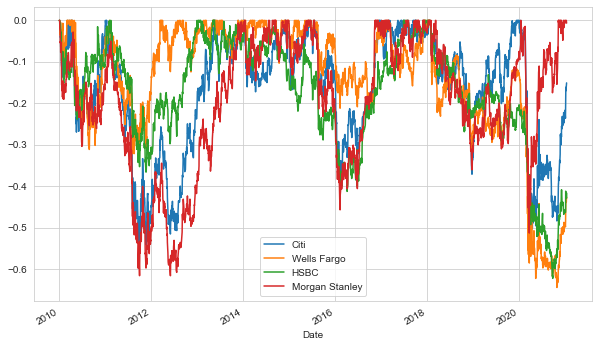

In [68]:
stats.prices.to_drawdown_series().plot(figsize = (10,6))

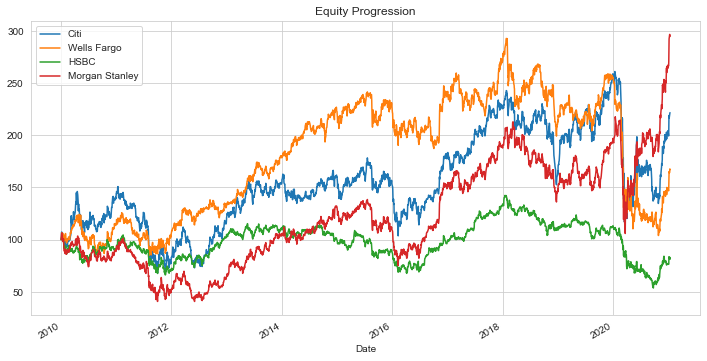

In [69]:
stats.plot(figsize= (12,6))

We can also use the display method on an individual PerformanceStats object to display stats for a single stock

In [71]:
stats["Morgan Stanley"].display()

Stats for Morgan Stanley from 2010-01-04 00:00:00 - 2021-01-13 00:00:00
Annual risk-free rate considered: 0.00%
Summary:
Total Return      Sharpe  CAGR    Max Drawdown
--------------  --------  ------  --------------
194.64%             0.45  10.30%  -61.62%

Annualized Returns:
mtd     3m      6m      ytd     1y      3y      5y      10y     incep.
------  ------  ------  ------  ------  ------  ------  ------  --------
10.26%  50.91%  52.63%  10.26%  47.47%  14.50%  26.02%  12.31%  10.30%

Periodic:
        daily    monthly    yearly
------  -------  ---------  --------
sharpe  0.45     0.50       0.51
mean    16.24%   16.51%     16.24%
vol     35.92%   32.81%     31.84%
skew    0.32     0.00       -0.64
kurt    9.47     1.17       -0.08
best    19.77%   30.96%     65.34%
worst   -15.60%  -24.49%    -43.90%

Drawdowns:
max      avg       # days
-------  ------  --------
-61.62%  -5.97%     65.32

Misc:
---------------  ------
avg. up month    7.07%
avg. down month  -7.12%
up year %   

In [73]:
stats["Morgan Stanley"].display_lookback_returns()

mtd      10.26%
3m       50.91%
6m       52.63%
ytd      10.26%
1y       47.47%
3y       14.50%
5y       26.02%
10y      12.31%
incep    10.30%
Name: Morgan Stanley, dtype: object

In [74]:
#stats attribute is just a series with all the stats
stats["Wells Fargo"].stats

start                    2010-01-04 00:00:00
end                      2021-01-13 00:00:00
rf                                         0
total_return                        0.671126
cagr                                0.047676
max_drawdown                       -0.644571
calmar                             0.0739654
mtd                                 0.119947
three_month                         0.372481
six_month                           0.341791
ytd                                 0.119947
one_year                           -0.325296
three_year                         -0.155886
five_year                         -0.0428328
ten_year                           0.0358074
incep                               0.047676
daily_sharpe                        0.305714
daily_sortino                       0.495399
daily_mean                         0.0902407
daily_vol                           0.295181
daily_skew                          0.014857
daily_kurt                           10.0148
best_day  

return_table is a table of monthly returns with year total at the end

In [75]:
stats["Citi"].return_table

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,YTD
2010,-0.023529,0.024096,0.191176,0.079012,-0.093821,-0.050505,0.090426,-0.095122,0.053908,0.066496,0.007194,0.126190,0.391176
2011,0.019028,-0.029046,-0.055555,0.038461,-0.103265,0.011908,-0.079010,-0.190141,-0.174879,0.233021,-0.129813,-0.042576,-0.443294
2012,0.167617,0.084979,0.096938,-0.096033,-0.197394,0.033950,-0.010215,0.095506,0.101313,0.142726,-0.075174,0.144345,0.505512
2013,0.065977,-0.004507,0.054086,0.054702,0.114474,-0.077323,0.086929,-0.072895,0.003724,0.005767,0.084871,-0.015306,0.318358
2014,-0.089621,0.025300,-0.021180,0.006513,-0.006889,-0.009880,0.038637,0.056021,0.003291,0.033195,0.008220,0.002594,0.039218
2015,-0.132139,0.116507,-0.017169,0.034938,0.015214,0.021450,0.059190,-0.085187,-0.072363,0.072740,0.017303,-0.043261,-0.040816
2016,-0.176182,-0.087600,0.074646,0.109675,0.006266,-0.089757,0.037246,0.089705,-0.010683,0.040652,0.151098,0.053910,0.159033
2017,-0.060575,0.074355,0.000167,-0.009064,0.024019,0.104724,0.023475,-0.001533,0.069234,0.010448,0.031628,-0.014437,0.270267
2018,0.054697,-0.034197,-0.105842,0.011407,-0.018520,0.003449,0.074268,-0.002795,0.007019,-0.087538,-0.003423,-0.196481,-0.284863
2019,0.238186,-0.000469,-0.027509,0.136290,-0.115275,0.126790,0.016136,-0.088902,0.073504,0.040243,0.052838,0.063499,0.578204


# Calculations 

ffn includes a lot of different functions for calculating different rates and ratios. Most are pretty self explanatory but a more comprehensive explanation can be found in the ffn documentation.

In [76]:
ffn.calc_cagr(prices)

Citi              0.074875
Wells Fargo       0.047676
HSBC             -0.018530
Morgan Stanley    0.102971
dtype: float64

In [77]:
ffn.calc_calmar_ratio(prices)

Citi              0.132505
Wells Fargo       0.073965
HSBC             -0.029762
Morgan Stanley    0.167098
dtype: float64

In [82]:
returns.calc_mean_var_weights()

Citi              9.088603e-02
Wells Fargo       0.000000e+00
HSBC              2.220446e-16
Morgan Stanley    9.091140e-01
dtype: float64

In [83]:
ffn.calc_inv_vol_weights(returns)

Citi              0.212221
Wells Fargo       0.257839
HSBC              0.318054
Morgan Stanley    0.211886
dtype: float64

In [84]:
ffn.calc_risk_return_ratio(prices)

Citi              3.615976
Wells Fargo       3.279030
HSBC              5.762060
Morgan Stanley    2.544964
dtype: float64

In [86]:
#probabilistic momentum: probability one asset will outperform the other
ffn.calc_prob_mom(returns = returns["Morgan Stanley"], other_returns = returns["HSBC"])

0.5029856197322552

In [92]:
ffn.calc_total_return(prices) * 100 #to get total return as a percentage

Citi              121.683007
Wells Fargo        67.112566
HSBC              -18.634335
Morgan Stanley    194.635380
dtype: float64

In [93]:
ffn.calc_max_drawdown(prices) * 100 #read as a percentage

Citi             -56.507573
Wells Fargo      -64.457122
HSBC             -62.260158
Morgan Stanley   -61.623242
dtype: float64

Ex. Citi's total return has been 121% while their max drawdown was 56%

calc_clusters() will cluster the stocks based on how correlated the series are (using k-means clustering) and return a dictionary with the cluster number and names of the stocks in that cluster

n is the number of clusters and plot is whether or not to show a plot of the clusters

{0: ['Citi', 'Wells Fargo', 'Morgan Stanley'], 1: ['HSBC']}

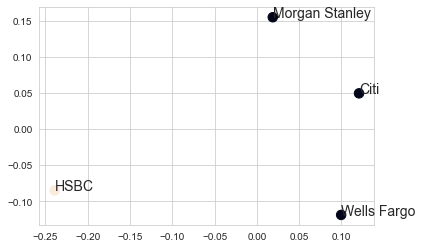

In [78]:
ffn.calc_clusters(returns, n = 2, plot = True)

{0: ['Citi', 'Morgan Stanley'], 2: ['Wells Fargo'], 1: ['HSBC']}

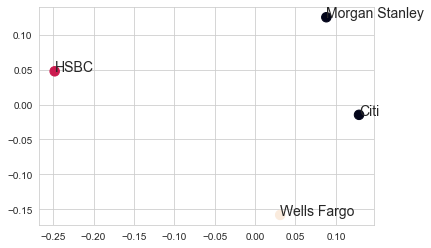

In [79]:
ffn.calc_clusters(returns, n = 3, plot = True)

# Other Tools

deannualize converts a return expressed in annual terms to one expressed on a different basis. For example, let's say we wanted returns expressed biweekly

nperiods would be 52 / 2 for biweekly, 252 for daily, 12 for monthly, etc.

In [97]:
biweekly_returns = ffn.deannualize(returns, nperiods= 52 / 2)
biweekly_returns

,Citi,Wells Fargo,HSBC,Morgan Stanley
Date,,,,
2010-01-05,0.001444,0.001042,0.000609,0.001382
2010-01-06,0.001181,0.000055,0.000045,0.000489
2010-01-07,0.000106,0.001372,-0.000123,0.000553
2010-01-08,-0.000637,-0.000358,-0.000085,-0.000791
2010-01-11,0.000426,-0.000080,0.000026,-0.000251
...,...,...,...,...
2021-01-07,0.000451,0.000861,-0.000191,0.000652
2021-01-08,-0.000380,-0.000277,-0.000275,0.000159
2021-01-11,0.000625,0.000058,-0.000528,0.000412


drawdown_details() displays the start and end date, length in days, and drawdown for a given stocks drawdown series

In [151]:
drawdown_series = ffn.to_drawdown_series(prices["ms"])
ffn.drawdown_details(drawdown_series)

,Start,End,Length,drawdown
0,2012-05-22 00:00:00,2012-05-23 00:00:00,1,-0.00767916
1,2012-05-24 00:00:00,2012-05-29 00:00:00,5,-0.0144945
2,2012-05-31 00:00:00,2012-06-08 00:00:00,8,-0.0313899
3,2012-06-11 00:00:00,2012-06-18 00:00:00,7,-0.015767
4,2012-06-20 00:00:00,2012-07-02 00:00:00,12,-0.031256
...,...,...,...,...
87,2020-08-14 00:00:00,2020-08-18 00:00:00,4,-0.00349972
88,2020-08-25 00:00:00,2020-08-26 00:00:00,1,-0.00820374
89,2020-08-27 00:00:00,2020-08-31 00:00:00,4,-0.0135549
90,2020-09-02 00:00:00,2020-12-28 00:00:00,117,-0.203756


## Miscellaneous

In [4]:
#for creating random weight portfolios as benchmarks
#returns a list of random weights of length n
ffn.random_weights(n = 3)

[0.3887900931386078, 0.23143282619092143, 0.3797770806704708]

Couldn't think of much use for this one but maybe someone else will

In [5]:
# splits by space, only keeps first half, removes non letter characters,returns as lowercase
ffn.utils.clean_tickers(["$BAC Stock", "SPY! Index", "JPM Chase"])

['bac', 'spy', 'jpm']

In [104]:
#scales value from within the first range to be within the 2nd range
ffn.utils.scale(37, (0, 49), (-1, 1))

0.510204081632653

## The End